1. Label foods that experts consider significantly healthier than the average public opinion.  
   - Tip: Adjust the `add_labels` function.  
   - Set horizontal alignment to `right`.  
   - Position `offset_spacing` on the right side of the label.

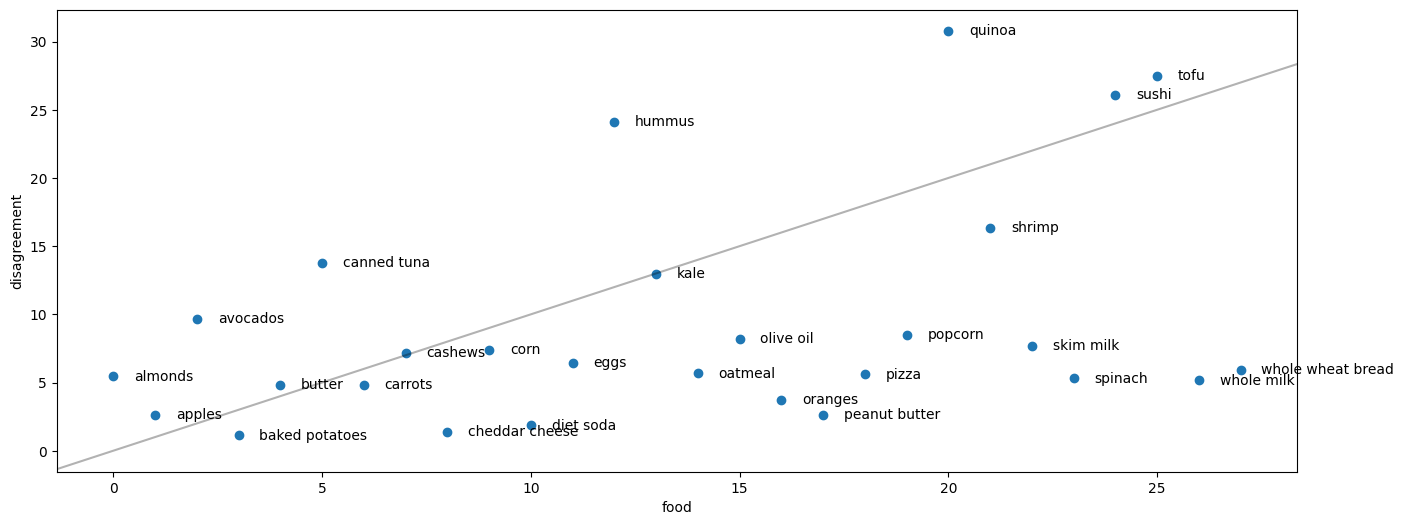

In [ ]:
import pandas as pd 
experts = pd.read_csv('healthy-food-survey-experts.csv')
public = pd.read_csv('healthy-food-survey-public.csv')

# Considered healthy by experts
experts['healthy'] = experts.eval('yes/(yes+no+no_opinion) * 100')
experts = experts.sort_values('food').round(2)

# Considered healthy by the public
public['healthy'] = public.eval('yes/(yes+no+no_opinion) * 100')
public = public.sort_values('food').round(2)

# Create new Dataframe with food, healthy_expert, healthy_public
df = pd.DataFrame()
df['food'] = public['food']
df['expert'] = experts['healthy']
df['public'] = public['healthy']

# Calculate the difference between the two measures
df['difference_points'] = df.eval('expert - public')

# Display food considered healthier by experts than by the public
healthier_foods = df.query('difference_points > 0')

# Plot
import matplotlib.pyplot as plt

def add_labels(healthier_foods, x_col, y_col, label_col):
    """
    Create labels for a plot
    """
    # Convertir en positions numériques because food is a string type value
    x_positions = range(len(healthier_foods)) # Create list = range from 0 to the size of the Dataframe
    
    for i, (index, row) in enumerate(healthier_foods.iterrows()):
        x = x_positions[i]  
        y = row[y_col]
        offset_spacing = 0.5 
        label = row[label_col]  # Label name = name that will be display on points
        plt.text(x + offset_spacing, y, label, 
                 va='center', 
                 ha='left')  

# Show
plt.figure(figsize=(16,6))
plt.scatter(range(len(healthier_foods)), healthier_foods['difference_points'])
add_labels(healthier_foods, 'food', 'difference_points', 'food')  
plt.ylabel('disagreement')
plt.xlabel('food')

# Draw a line to show foods closest to 1:1
plt.axline((0,0), (1,1), color="black", alpha=0.3)

Label foods where both the public and experts agree on their healthiness or unhealthiness.

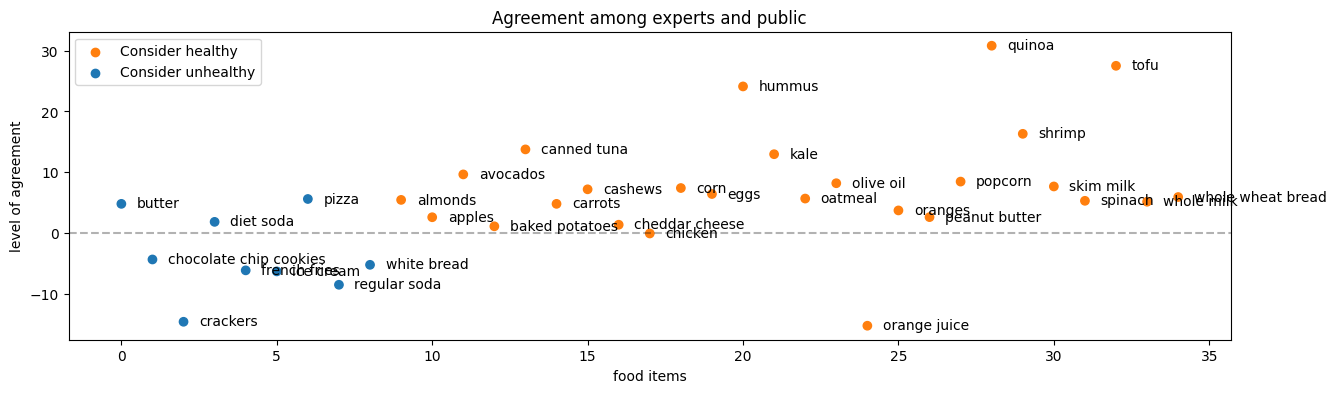

In [40]:
# Create df and assign the colors
unhealthiness = df.query('public < 50 & expert < 50').copy()
unhealthiness['color'] = 'C0'

healthiness = df.query('public > 50 & expert > 50').copy()
healthiness['color'] = 'C1'

# Fusion the two new dataframes
df2 = pd.concat([unhealthiness, healthiness])

# Figure config
plt.figure(figsize=(15,4))
plt.title('Agreement among experts and public')
plt.xlabel('food items')
plt.ylabel('level of agreement')
plt.axhline(0, alpha=0.3, linestyle='--', color='black')
# Get numeric value for food
x_range = range(len(df2))

# Plot
plt.scatter(x_range, df2['difference_points'], color=df2['color'])

# Add labels for food
add_labels(df2, x_range, 'difference_points', 'food')

# Legend for the color
plt.scatter([], [], color='C1', label='Consider healthy')
plt.scatter([], [], color='C0', label='Consider unhealthy')
plt.legend()